In [1]:
import torchvision
import torch
from torch import Tensor
from plots import plot_training_result, plot_image_data

from vae.mnist_vae import  VaeAutoencoderClassifier
from image_classifier.image_classifier import MNISTClassifier

In [2]:
training_data = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=torchvision.transforms.ToTensor())
testing_data = torchvision.datasets.MNIST(root='../data', train=False, download=True, transform=torchvision.transforms.ToTensor())

print(training_data)
print(testing_data)

input = training_data.data[:60000] / 255.0
labels = training_data.targets[:60000]

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ../data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
vae = VaeAutoencoderClassifier(dim_encoding=2)

vae_classifier_model, total_losses, classifier_accuracy_li, classifier_loss_li, vae_loss_li, kl_loss_li = vae.train_model(
    training_data,
    batch_size=100,
    alpha=50000.0,
    epochs=10
)

tensor([[-1.0755,  0.6100],
        [ 0.2501,  0.4237],
        [ 0.8711,  1.4371],
        [-0.9770, -1.4078],
        [ 0.2813,  0.3255],
        [ 1.1003,  0.3636],
        [-0.8248,  1.0937],
        [ 0.0885,  0.0552],
        [ 1.1177,  0.9421],
        [ 0.5878, -0.6341],
        [ 0.0690,  0.3044],
        [ 0.4280,  0.3468],
        [-1.1324, -0.8572],
        [-0.1058, -0.9172],
        [-0.6918, -1.3486],
        [ 0.4188,  0.8860],
        [-0.6953, -0.0208],
        [-0.4430,  2.0262],
        [-0.0321, -1.8978],
        [-0.2931,  0.4870],
        [-0.9960,  0.0666],
        [ 0.0947, -1.3252],
        [ 0.0255,  0.7989],
        [ 0.0466, -0.6724],
        [ 0.9732, -0.1855],
        [-1.1556,  0.8040],
        [ 1.1791, -0.6310],
        [ 1.0763, -0.7519],
        [ 0.1728, -1.5960],
        [-0.6681,  0.8770],
        [ 1.2472,  2.1753],
        [-1.0293,  1.2424]])
torch.Size([32, 2])


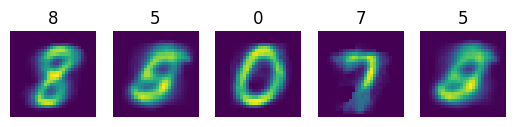

In [15]:
# plot generated data
image_tensor, label_tensor = vae.generate_data()
plot_image_data(image_tensor.cpu().detach().numpy(), label_tensor.cpu().detach().numpy())

In [9]:
# move tensors to cpu before converting to np array
np_classifier_accuracy_li = []
np_classifier_loss_li = []
np_vae_loss_li = []
np_kl_loss_li = []

for output in classifier_accuracy_li:
    if isinstance(output, Tensor):
        np_classifier_accuracy_li.append(output.cpu().detach().numpy())

for output in classifier_loss_li:
    if isinstance(output, Tensor):
        np_classifier_loss_li.append(output.cpu().detach().numpy())
        
for output in vae_loss_li:
    if isinstance(output, Tensor):
        np_vae_loss_li.append(output.cpu().detach().numpy())

for output in kl_loss_li:
    if isinstance(output, Tensor):
        np_kl_loss_li.append(output.cpu().detach().numpy())


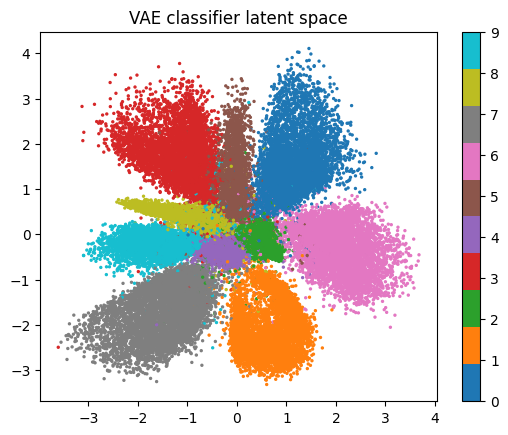

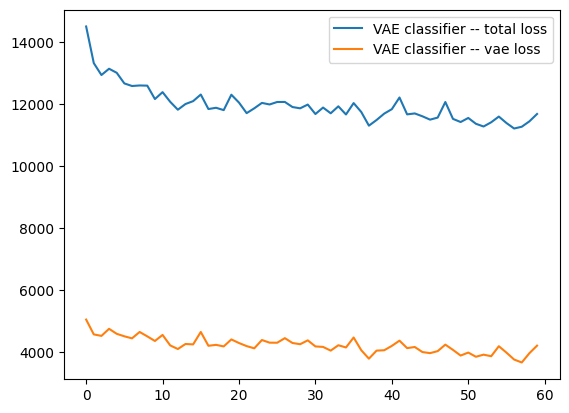

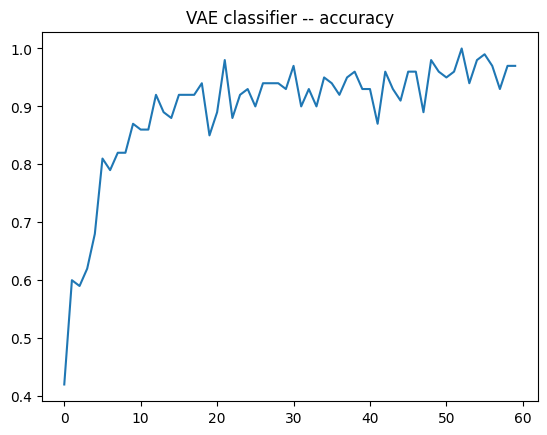

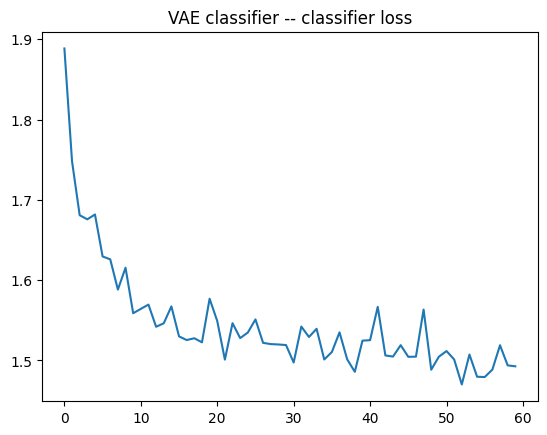

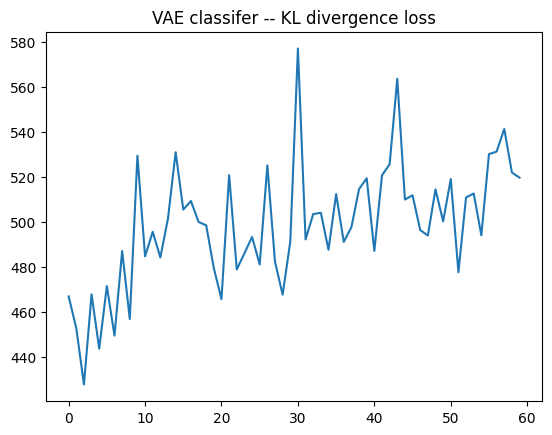

In [10]:
# plot results
plot_training_result(
    input=input,
    labels=labels,
    vae_model_classifier=vae_classifier_model,
    vae_loss_li=np_vae_loss_li,
    total_losses=total_losses, 
    classifier_accuracy_li=np_classifier_accuracy_li, 
    classifier_loss_li=np_classifier_loss_li,
    kl_loss_li=np_kl_loss_li
)

In [11]:
# train classifier for performance evaluation

classifier = MNISTClassifier(input_size=784, num_classes=10)
classifier.train_model(training_data, batch_size=100, epochs=5)
accuracy = classifier.test_model(testing_data)
print("Test accuracy: ", accuracy)

Epoch done:  1
Epoch done:  2
Epoch done:  3
Epoch done:  4
Epoch done:  5
Finished Training
Test accuracy:  0.9795


In [12]:
x, y = vae.generate_data(n_samples=32)

for i in range(100):
    image_tensor, label_tensor = vae.generate_data(n_samples=32)
    x = torch.cat((x, image_tensor), dim=0)
    y = torch.cat((y, label_tensor), dim=0)

assert x.shape[0] == y.shape[0]
print("Number of images: ", x.shape[0])

tensor([[-0.1535,  0.3171],
        [-0.5875, -1.3375],
        [ 0.3515,  0.6703],
        [ 0.2527,  1.1743],
        [-0.6709, -0.6584],
        [-0.4060,  0.4136],
        [-0.2103,  0.3584],
        [-0.1392,  0.7438],
        [ 0.1298, -2.1119],
        [-0.0752, -0.1380],
        [ 1.1831,  0.2122],
        [-1.3731,  0.3844],
        [-0.9035, -0.1431],
        [ 1.1649, -1.2897],
        [ 0.1649,  0.6172],
        [ 1.7330,  0.6137],
        [ 1.3859, -0.7509],
        [ 0.4567,  1.6381],
        [-0.8060,  1.0253],
        [ 0.6408,  0.9015],
        [-0.7455, -1.2613],
        [ 0.1244, -0.9325],
        [ 1.5752, -0.6095],
        [ 0.5274,  0.0058],
        [-0.9233,  0.1263],
        [-0.6773,  1.8567],
        [ 1.6765,  0.0915],
        [ 1.0456, -0.3843],
        [ 1.0641,  0.6981],
        [-0.5236,  0.0553],
        [-0.9708, -0.0574],
        [-0.4212,  0.0924]])
torch.Size([32, 2])
tensor([[ 0.5879, -1.5716],
        [ 0.5260,  0.5033],
        [ 0.6815,  2.0248],

In [13]:
# test quality of images
accuracy = classifier.test_model_syn_img(x, y)
print("Accuracy: ", accuracy)

Accuracy:  0.8326113861386139
